**ЛАБОРАТОРНАЯ РАБОТА 7. РАЗРАБОТКА ЕДИНОГО 
ШАБЛОНА ПРЕДВАРИТЕЛЬНОЙ ОБРАБОТКИ ДАННЫХ**

**В качестве наборов ресурсов, я использую Real estate valuation data set.xlsx**

**Описание набора**

**Оценка недвижимости - это регрессионная задача. Набор рыночных исторических данных для оценки недвижимости собран в районе Синдиан, Нью-Тайбэй, Тайвань. Набор данных был случайным образом разделён на обучающую выборку (2/3 образцов) и тестовую выборку (1/3 образцов).**

**Переменные таблицы:**

**Ввод данных осуществляется следующим образом**

 **No - ID**
 
 **X1 transaction date - Дата транзакции X1 = дата сделки (например, 2013.250=март 2013, 2013.500=июнь 2013 и т. д.)**
 
 **X2 house age - Возраст дома X2 = возраст дома (единица измерения: год)**
 
 **X3 distance to the nearest MRT station - Расстояние в 3 раза до ближайшей станции метро = расстояние до ближайшей станции метро (единица измерения: метр)**

 **X4 number of convenience stores - Количество круглосуточных магазинов X4 = количество магазинов шаговой доступности в радиусе пешей доступности (целое число)**
 
 **X5 latitude - X5 latitude = географическая координата, широта. (единица измерения: градус)**
 
 **X6 longitude - X6 долгота =географическая координата, долгота. (единица измерения: градус)**
 
 **Результат выглядит следующим образом**
 
 **Y house price of unit area - Y = цена за квадратный метр жилья (10000 новых тайваньских долларов/пин, где пин — местная единица измерения, 1 пин = 3,3 квадратного метра)**



**Для выполнения 7 лабораторной работы необходимо:**

Реализуйте первичную обработку данных загруженного набора. 
Выполните полный спектр операций для загруженного набора данных: 
загрузка, визуализация, обработка пропущенных значений, обработка 
категориальных данных и разделение выборки на тестовую и тренировочную.

Первые строки данных:
   No  X1 transaction date  X2 house age  \
0   1          2012.916667          32.0   
1   2          2012.916667          19.5   
2   3          2013.583333          13.3   
3   4          2013.500000          13.3   
4   5          2012.833333           5.0   

   X3 distance to the nearest MRT station  X4 number of convenience stores  \
0                                84.87882                               10   
1                               306.59470                                9   
2                               561.98450                                5   
3                               561.98450                                5   
4                               390.56840                                5   

   X5 latitude  X6 longitude  Y house price of unit area  
0     24.98298     121.54024                        37.9  
1     24.98034     121.53951                        42.2  
2     24.98746     121.54391                        47.3  
3     24

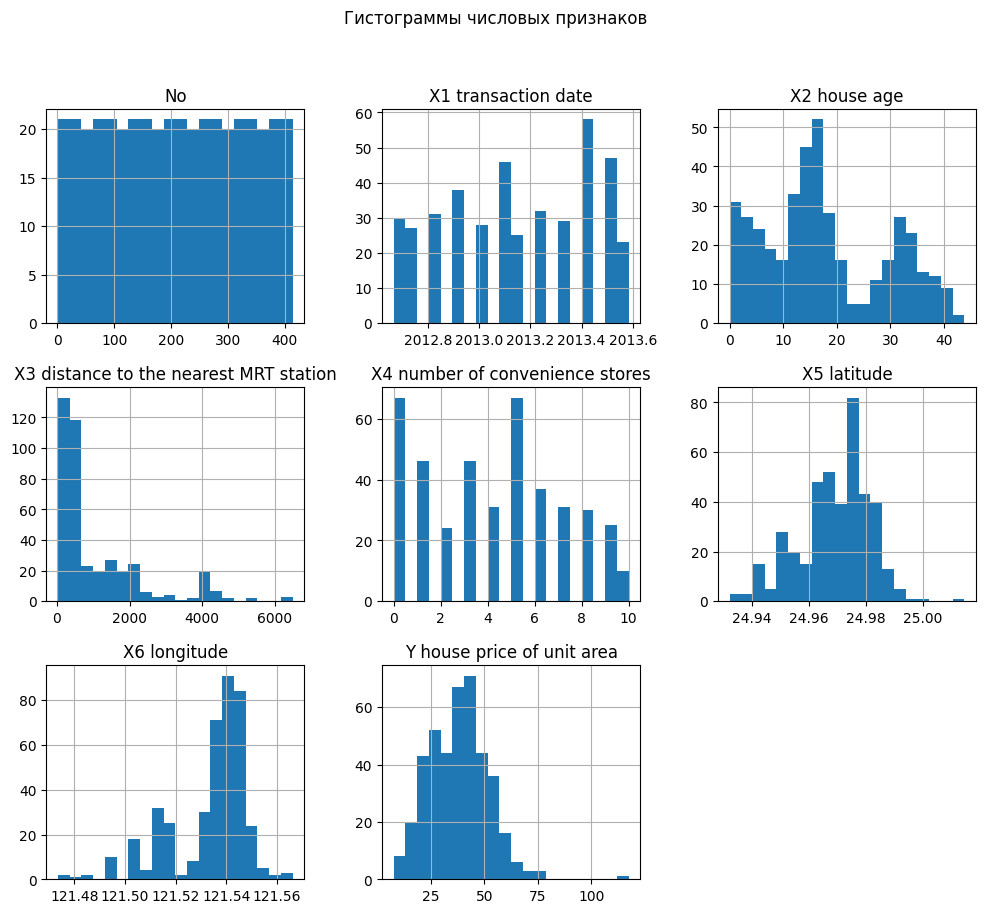

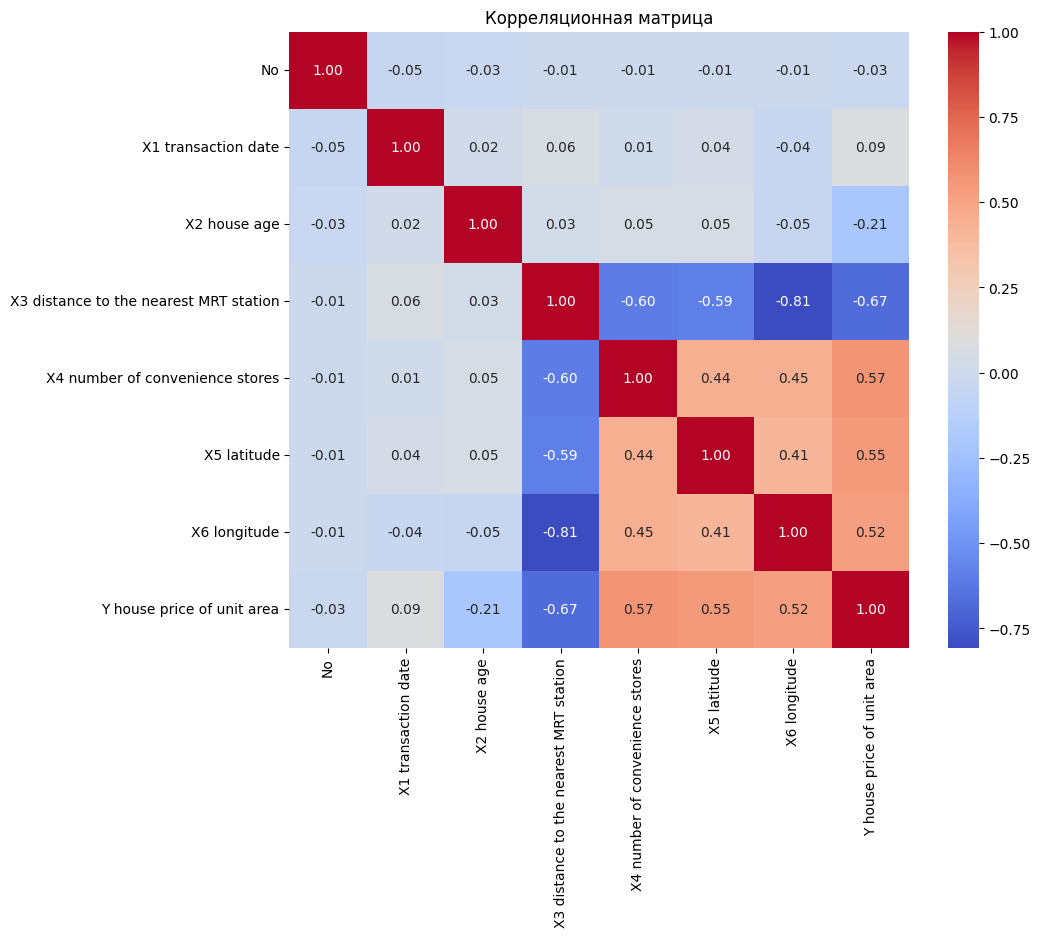


Категориальных столбцов не найдено.

Размеры выборок:
Тренировочная выборка: X_train: (289, 7), y_train: (289,)
Тестовая выборка: X_test: (125, 7), y_test: (125,)


In [7]:
# Подключение необходимых библиотек
import pandas as pd  # Для работы с данными в виде таблиц
import numpy as np  # Для выполнения математических операций
import matplotlib.pyplot as plt  # Для построения графиков
import seaborn as sns  # Для создания продвинутых визуализаций
from sklearn.model_selection import train_test_split  # Для разделения данных на тренировочные и тестовые
from sklearn.preprocessing import LabelEncoder  # Для кодирования категориальных данных

# Загрузка данных из Excel-файла
file_path = 'Real estate valuation data set.xlsx'  
data = pd.read_excel(file_path)  # Читаем данные из файла в DataFrame

# Первичное изучение данных
print("Первые строки данных:")  # Выводим первые строки, чтобы посмотреть, как выглядят данные
print(data.head())  # Печатаем первые 5 строк таблицы
print("\nОбщая информация о данных:")
print(data.info())  # Показываем информацию о столбцах (типы данных, пропущенные значения и т.д.)

# Проверка на наличие пропущенных значений
print("\nКоличество пропущенных значений в каждом столбце:")
print(data.isnull().sum())  # Выводим количество пропущенных значений по каждому столбцу

# Обработка пропущенных значений
# Если в данных есть пропуски, заменяем их медианным значением для числовых столбцов
data.fillna(data.median(numeric_only=True), inplace=True)  # Используем медиану, чтобы минимизировать влияние выбросов
print("\nПосле обработки пропущенных значений:")
print(data.isnull().sum())  # Проверяем, что все пропущенные значения успешно заполнены

# Визуализация распределения числовых данных
# Определяем числовые столбцы
numeric_columns = data.select_dtypes(include=[np.number]).columns  # Фильтруем только числовые данные
# Построение гистограмм для числовых столбцов
data[numeric_columns].hist(figsize=(12, 10), bins=20)  # Создаем гистограммы с 20 интервалами для каждого столбца
plt.suptitle('Гистограммы числовых признаков')  # Добавляем общий заголовок для всех графиков
plt.show()  # Отображаем графики

# Корреляционная матрица для числовых данных
plt.figure(figsize=(10, 8))  # Задаем размер графика
correlation_matrix = data.corr()  # Вычисляем корреляцию между числовыми столбцами
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")  # Построение тепловой карты с коэффициентами
plt.title('Корреляционная матрица')  # Заголовок графика
plt.show()  # Отображаем график

# Обработка категориальных данных
# Проверяем, есть ли в данных столбцы с типом object (текстовые данные)
categorical_columns = data.select_dtypes(include=['object']).columns  # Список категориальных столбцов
if len(categorical_columns) > 0:  # Если такие столбцы есть
    print("\nКатегориальные столбцы:", categorical_columns.tolist())  # Выводим их имена
    label_encoders = {}  # Создаем словарь для хранения кодировщиков
    for col in categorical_columns:  # Проходим по каждому категориальному столбцу
        label_encoders[col] = LabelEncoder()  # Инициализируем LabelEncoder
        data[col] = label_encoders[col].fit_transform(data[col])  # Кодируем категории в числовые значения
    print("\nПосле кодирования категориальных данных:")
    print(data.head())  # Выводим первые строки после преобразования
else:
    print("\nКатегориальных столбцов не найдено.")  # Сообщаем, если текстовых данных нет

# Разделение данных на признаки (X) и целевой столбец (y)
# Предполагаем, что 'Y house price of unit area' — это целевой столбец
X = data.drop(columns=['Y house price of unit area'])  # Убираем целевой столбец из признаков
y = data['Y house price of unit area']  # Выделяем целевой столбец

# Разделение данных на тренировочную и тестовую выборки
# 70% данных используется для обучения, 30% для тестирования
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Вывод информации о размерах тренировочной и тестовой выборок
print("\nРазмеры выборок:")
print(f"Тренировочная выборка: X_train: {X_train.shape}, y_train: {y_train.shape}")  # Размеры тренировочной выборки
print(f"Тестовая выборка: X_test: {X_test.shape}, y_test: {y_test.shape}")  # Размеры тестовой выборки


**Все задания были выполнены**